## EDA

In [40]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

Gather + assess

In [41]:
df=pd.read_csv('GDP_GROWTH.csv')
df.head(50)

,Time,GDP growth (annual %),"Inflation, consumer prices (annual %)",GDP (constant LCU),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)"
0,1975,-1.473649,24.207288,8.811980e+11,10.46769167,4
1,1976,2.910266,16.559523,9.068430e+11,11.10095,5.5
2,1977,2.457750,15.840267,9.291310e+11,8.911866667,5.8
3,1978,4.204261,8.263141,9.681940e+11,9.09315,5.7
4,1979,3.749017,13.421280,1.004490e+12,13.69480833,5.3
5,1980,-2.031368,17.965924,9.840870e+11,16.31268333,6.8
6,1981,-0.787744,11.876627,9.763350e+11,13.255,10.4
7,1982,1.994891,8.598864,9.958120e+11,11.93096667,10.9
8,1983,4.221856,4.609303,1.037850e+12,9.825266667,11.088
9,1984,2.269105,4.960711,1.061400e+12,9.6801,10.901


In [42]:
df.rename(columns={'Time': 'Year'}, inplace=True)
df.head()

,Year,GDP growth (annual %),"Inflation, consumer prices (annual %)",GDP (constant LCU),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)"
0,1975,-1.473649,24.207288,8.811980e+11,10.46769167,4
1,1976,2.910266,16.559523,9.068430e+11,11.10095,5.5
2,1977,2.457750,15.840267,9.291310e+11,8.911866667,5.8
3,1978,4.204261,8.263141,9.681940e+11,9.09315,5.7
4,1979,3.749017,13.421280,1.004490e+12,13.69480833,5.3


In [43]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year
df.head()

,Year,GDP growth (annual %),"Inflation, consumer prices (annual %)",GDP (constant LCU),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)"
0,1975,-1.473649,24.207288,8.811980e+11,10.46769167,4
1,1976,2.910266,16.559523,9.068430e+11,11.10095,5.5
2,1977,2.457750,15.840267,9.291310e+11,8.911866667,5.8
3,1978,4.204261,8.263141,9.681940e+11,9.09315,5.7
4,1979,3.749017,13.421280,1.004490e+12,13.69480833,5.3


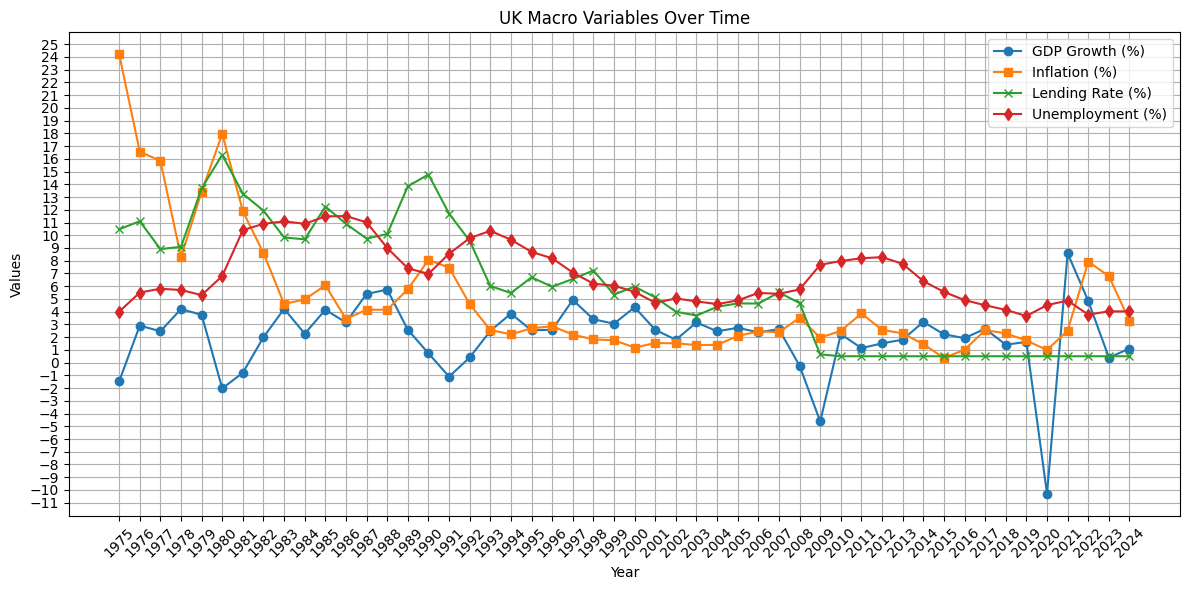

In [59]:
# Plot
plt.figure(figsize=(12, 6))

plt.plot(df['Year'], df['GDP growth (annual %)'], marker='o', label='GDP Growth (%)')
plt.plot(df['Year'], df['Inflation, consumer prices (annual %)'], marker='s', label='Inflation (%)') 
plt.plot(df['Year'], df['Lending interest rate (%)'], marker='x', label='Lending Rate (%)')
plt.plot(df['Year'], df['Unemployment, total (% of total labor force) (national estimate)'], marker='d', label='Unemployment (%)')

# Titles and labels
plt.title("UK Macro Variables Over Time")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.xticks(df['Year'])
plt.xticks(rotation=45)
plt.yticks(np.arange(-11, 26, 1)) 
plt.grid(True)
plt.tight_layout()
plt.show()

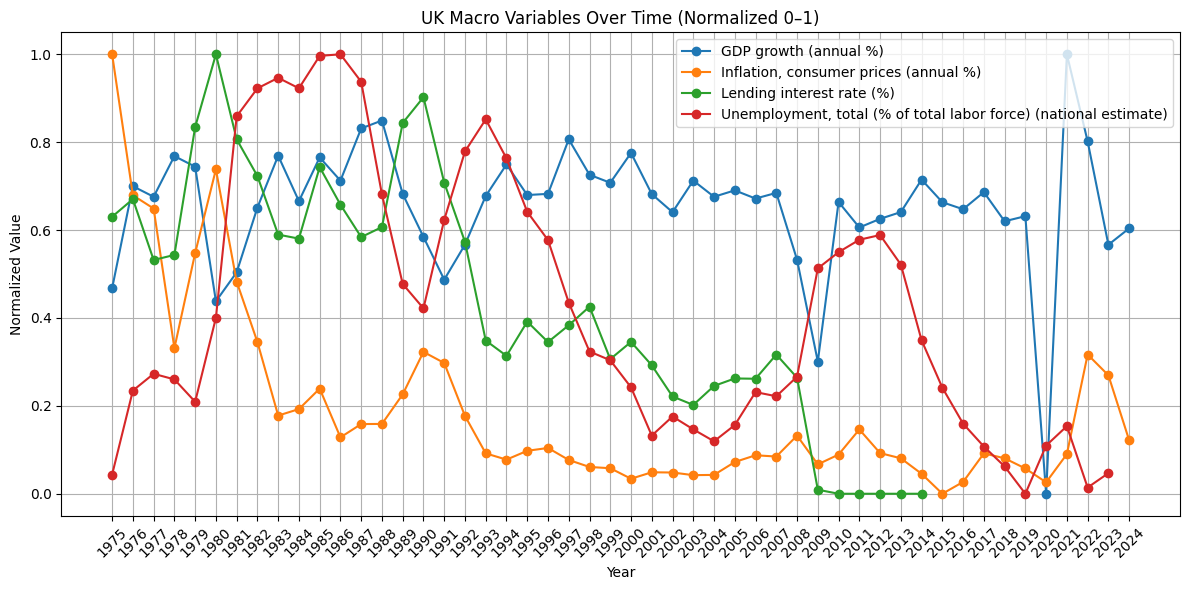

In [45]:
# Convert all columns except 'Year' to numeric (in case of strings)
cols_to_normalize = df.columns.drop(['Year','GDP (constant LCU)'])
df[cols_to_normalize] = df[cols_to_normalize].apply(pd.to_numeric, errors='coerce')

# Normalize columns (min-max)
df_norm = df.copy()
df_norm[cols_to_normalize] = (df[cols_to_normalize] - df[cols_to_normalize].min()) / (df[cols_to_normalize].max() - df[cols_to_normalize].min())

# Plot normalized values
plt.figure(figsize=(12, 6))
for col in cols_to_normalize:
    plt.plot(df_norm['Year'], df_norm[col], marker='o', label=col)
    
plt.xticks(df['Year'][::5], rotation=45)

plt.title("UK Macro Variables Over Time (Normalized 0–1)")
plt.xlabel("Year")
plt.ylabel("Normalized Value")
plt.legend()
plt.xticks(rotation=45)
plt.xticks(df['Year'])
plt.grid(True)
plt.tight_layout()
plt.show()

Business Question: What relationships do we observe between our macroeconomic features and GDP growth rate?
Answer: 
Some years show negative GDP growth despite low unemployment, highlighting external shocks like COVID-19 in 2020.
High inflation years coincide with high lending rates, reflecting monetary tightening to control inflation.
Extreme recession events such as in 2009 and 2020 show sharp GDP declines. While macro features explain trends, external shocks can have large effects that the models may not be able to predict; we will observe how well the model handles predicting these shocks
GDP growth reacts with a lag to changes in interest rates or unemployment; to develop the model further, one could benefit from adding lagged variables.

# Clearning the data

ffill() is required as columns values have null values. NB: modelling cannot be done if there are NA values

In [47]:
df.ffill(inplace=True)
df.tail()

,Year,GDP growth (annual %),"Inflation, consumer prices (annual %)",GDP (constant LCU),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)"
45,2020,-10.296919,0.989487,2.103490e+12,0.5,4.518
46,2021,8.575951,2.518371,2.283880e+12,0.5,4.865
47,2022,4.839085,7.922049,2.394400e+12,0.5,3.768
48,2023,0.397082,6.793967,2.403910e+12,0.5,4.025
49,2024,1.100668,3.271573,2.430370e+12,0.5,4.025


# Linear Regression Machine Learning Model

In [48]:
# Split the data into features and labels
X = df.drop(['Year','GDP growth (annual %)','GDP (constant LCU)'], axis=1)
y = df["GDP growth (annual %)"]

In [51]:
# Split your data with these ratios: train: 0.75 | test: 0.25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [52]:
# Train a linear regression model on the training set
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Make predictions on the training and test set
linear_predictions_train = linear_model.predict(X_train)
linear_predictions_test = linear_model.predict(X_test)
print(linear_predictions_test[:10])

[ 1.800894    0.70764604  1.62650866  2.94943913  2.47309261 -0.07786008
  2.36551099  2.49101304  2.43422872  2.92488867]


In [54]:
# Compare the predictions with the actual values
print(y_test[:10].values)

[  1.99489123   4.83908518   2.23331509   2.73266077   4.14741501
   2.45775045   2.48983093 -10.29691886   1.9217101    3.15034061]


In [55]:
# Calculate the relative error of these predictions
relative_errors = np.abs(linear_predictions_test - y_test) / y_test * 100
print("Relative errors in per cent: ", relative_errors[:10].values)

Relative errors in per cent:  [   9.72470178   85.37644998   27.17065888    7.93286767   40.37026432
  103.16794067    4.99310755 -124.19182932   26.66992381    7.15643055]


The relative errors show how large the error is compared to the actual value. Lower the relative errors the better. The relative errors demonstrates varying degrees of accuracy.

Business Question: How well can the model handle external shocks?
Answer: Not well. There was a shock in 2020, which has a relative error of -124.19%. To improve this, furture models should experiment with different features, to observe if this can be mitigated.

In [56]:
# Calculate the root mean squared error on the training and test set
from sklearn.metrics import root_mean_squared_error
rmse_train = root_mean_squared_error(y_train, linear_predictions_train)
print(rmse_train)
rmse_test = root_mean_squared_error(y_test, linear_predictions_test)
print(rmse_test)

2.1351300683802648
3.8921159294523124


RMSE can be used to gauge overall model accuracy, rather than indinvidual data points like the relative errors. Tells us how far, on average, predictions are from true values, with larger errors penalised more (because of the square)

Having the test error less than the training error is unusual. This is perhaps due to the small size of the test set relative to the training set. The model is fairly robust, but there may be underfitting. However, the low test error suggests using the model will provide useful predictions.

Business Question: Can we forecast UK GDP growth using macroeconomic features like inflation, unemployment, lending rates, and consumer prices?
Answer: A low RMSE on the data set, with some data points containing low relative errors, indicate this initial model can be used to forecast UK GDP growth